## Gerekli Kutuphanelerin Yuklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
#import Yusuf2
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Verileri Yukleyelim

In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e19/sample_submission.csv')

In [3]:
train_data.shape, test_data.shape

((136950, 6), (27375, 5))

### train ile test verisini birleştirip işlem yapalım

In [4]:
df = train_data.append(test_data)

In [5]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0
...,...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN


### Verileri inceleyelim.

In [6]:
df.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164325 entries, 0 to 27374
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        164325 non-null  int64  
 1   date      164325 non-null  object 
 2   country   164325 non-null  object 
 3   store     164325 non-null  object 
 4   product   164325 non-null  object 
 5   num_sold  136950 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 8.8+ MB


In [8]:
df.isnull().sum()

id              0
date            0
country         0
store           0
product         0
num_sold    27375
dtype: int64

In [9]:
df.describe(include = object)

,date,country,store,product
count,164325,164325,164325,164325
unique,2191,5,3,5
top,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
freq,75,32865,54775,32865


### Sutunlari duzenleyelim.

In [10]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

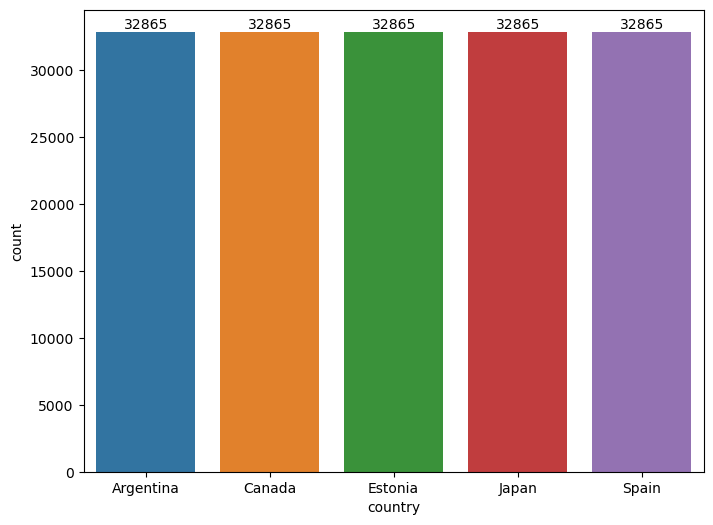

In [11]:
plt.figure(figsize = (8, 6))
ax = sbn.countplot(x = df["country"])
ax.bar_label(ax.containers[0]);

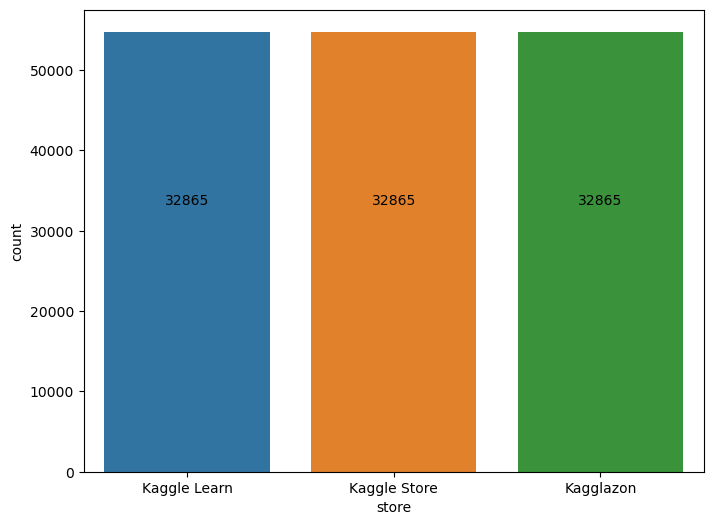

In [12]:
plt.figure(figsize = (8, 6))
bx = sbn.countplot(x = df["store"])
bx.bar_label(ax.containers[0]);

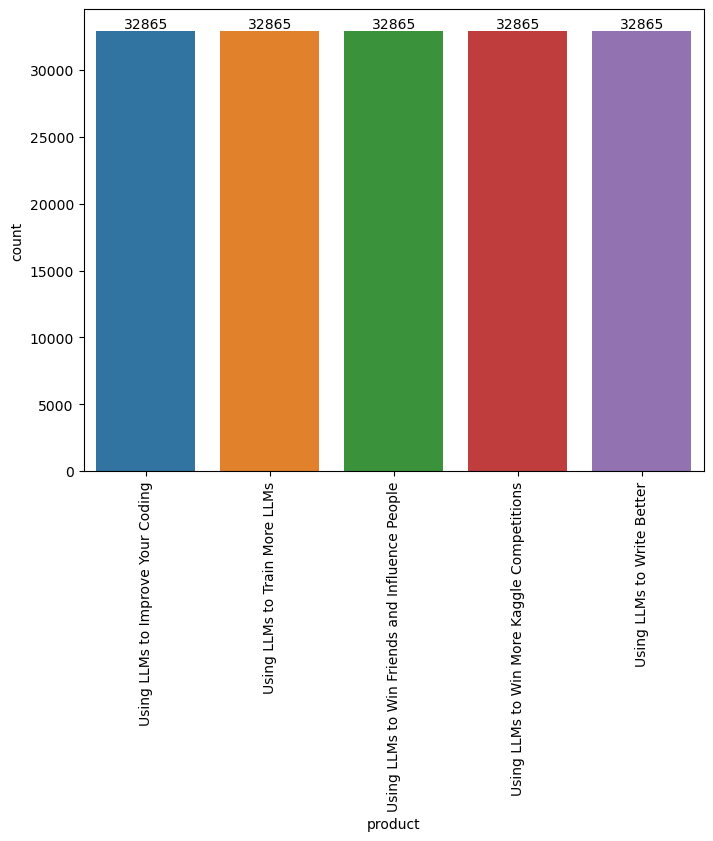

In [13]:
plt.figure(figsize = (8, 6))
cx = sbn.countplot(x = df["product"])
cx.bar_label(ax.containers[0]);
plt.xticks(rotation = 90);

### id sutununu silelim

In [14]:
del df['id']

### Date sutunu kullanarak ay ve yıl sutunlarını olusturalım

In [15]:
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [16]:
df.drop('date', axis = 1, inplace = True)

In [17]:
df

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0,2017,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0,2017,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0,2017,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0,2017,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0,2017,1
...,...,...,...,...,...,...
27370,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN,2022,12
27371,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN,2022,12
27372,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN,2022,12
27373,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN,2022,12


### Train ile test verisini ayıralım

In [18]:
train = df.iloc[:136950]
train

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63.0,2017,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66.0,2017,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9.0,2017,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0,2017,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,49.0,2017,1
...,...,...,...,...,...,...
136945,Spain,Kagglazon,Using LLMs to Improve Your Coding,700.0,2021,12
136946,Spain,Kagglazon,Using LLMs to Train More LLMs,752.0,2021,12
136947,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111.0,2021,12
136948,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641.0,2021,12


In [19]:
test = df.iloc[136950:]
test

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,NaN,2022,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,NaN,2022,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,NaN,2022,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,NaN,2022,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,NaN,2022,1
...,...,...,...,...,...,...
27370,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN,2022,12
27371,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN,2022,12
27372,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN,2022,12
27373,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN,2022,12


### makine öğrenmesi algoritmalarının skorlarına bakalım.

In [20]:
x = train.drop('num_sold', axis = 1)
y = train['num_sold']

In [21]:
x = pd.get_dummies(x, drop_first = True)

In [22]:
x

,year,month,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2017,1,0,0,0,0,1,0,0,0,0,0
1,2017,1,0,0,0,0,1,0,1,0,0,0
2,2017,1,0,0,0,0,1,0,0,1,0,0
3,2017,1,0,0,0,0,1,0,0,0,1,0
4,2017,1,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
136945,2021,12,0,0,0,1,0,0,0,0,0,0
136946,2021,12,0,0,0,1,0,0,1,0,0,0
136947,2021,12,0,0,0,1,0,0,0,1,0,0
136948,2021,12,0,0,0,1,0,0,0,0,1,0


In [23]:
y

0          63.0
1          66.0
2           9.0
3          59.0
4          49.0
          ...  
136945    700.0
136946    752.0
136947    111.0
136948    641.0
136949    539.0
Name: num_sold, Length: 136950, dtype: float64

In [24]:
def regresyon(x, y):
    lin = LinearRegression()
    rid = Ridge()
    las = Lasso()
    ela = ElasticNet()
    sup = SVR()
    ran = RandomForestRegressor()
    dec = DecisionTreeRegressor()
        
    models = [lin, rid, las, ela, sup, ran, dec]
    model_names = ["Linear_R", "Ridge", "Lasso", "Elastic", "Support", "Random", "Decision_T"]
        
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
        
    r2 = []
        
    skor = pd.DataFrame(columns = ["R2_Score"], index = model_names)
        
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        
            
    skor["R2_Score"] = r2

    #return skor.sort_values('R2_Score', ascending = False)


    print(skor.sort_values('R2_Score', ascending = False))
        
    plt.figure(figsize=(10, 6))
        
    sbn.barplot(data = skor, y ='R2_Score', x = skor.index, color = 'lightblue')
    for i, v in enumerate(skor['R2_Score']):
        plt.text(i, v, str(round(v, 2)), color='black', ha='center')
    plt.xlabel('R2_Score')
    plt.ylabel('Models')
    plt.title('R2_Score of Regression Models')
    plt.show()

             R2_Score
Random      97.948594
Decision_T  97.946701
Support     92.141106
Linear_R    74.973816
Ridge       74.973807
Lasso       74.877357
Elastic     56.746709


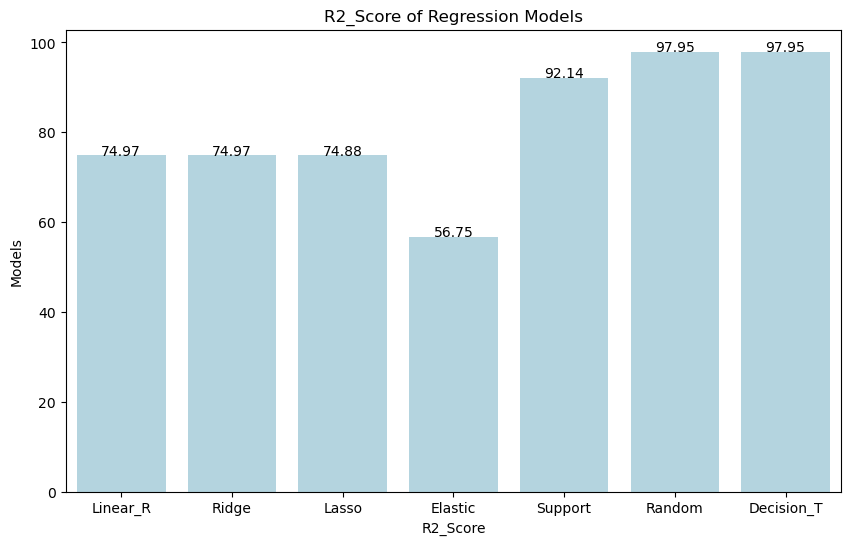

In [25]:
regresyon(x, y)

### Şimdi de Derin Öğrenme modelinin skoruna bakalım

In [26]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
#x_train = MinMaxScaler().fit_transform(x_train)
#x_test = MinMaxScaler().fit_transform(x_test)

In [28]:
model = Sequential()
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(optimizer = 'adamax', loss = 'mse')

In [29]:
erken_durma = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min')

In [30]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), 
                    verbose = 1, batch_size = 32, epochs = 100, callbacks = [erken_durma])

Epoch 1/100
3424/3424 [==============================] - 19s 5ms/step - loss: 4858.6309 - val_loss: 1316.7720
Epoch 2/100
3424/3424 [==============================] - 17s 5ms/step - loss: 2090.0061 - val_loss: 2789.4590
Epoch 3/100
3424/3424 [==============================] - 15s 5ms/step - loss: 1819.6250 - val_loss: 4533.9434
Epoch 4/100
3424/3424 [==============================] - 16s 5ms/step - loss: 1651.1353 - val_loss: 4532.9546
Epoch 5/100
3424/3424 [==============================] - 15s 5ms/step - loss: 1555.1348 - val_loss: 3858.6538
Epoch 6/100
3424/3424 [==============================] - 17s 5ms/step - loss: 1432.8818 - val_loss: 4556.9307
Epoch 7/100
3424/3424 [==============================] - 16s 5ms/step - loss: 1415.3159 - val_loss: 4375.7256
Epoch 8/100
3424/3424 [==============================] - 16s 5ms/step - loss: 1348.4473 - val_loss: 5465.3291
Epoch 9/100
3424/3424 [==============================] - 16s 5ms/step - loss: 1307.7848 - val_loss: 4829.1021
Epoch 10/1

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                650       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 100)               5100      
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0

In [32]:
model.evaluate(x_train, y_train)

3424/3424 [==============================] - 7s 2ms/step - loss: 4425.7495


4425.74951171875

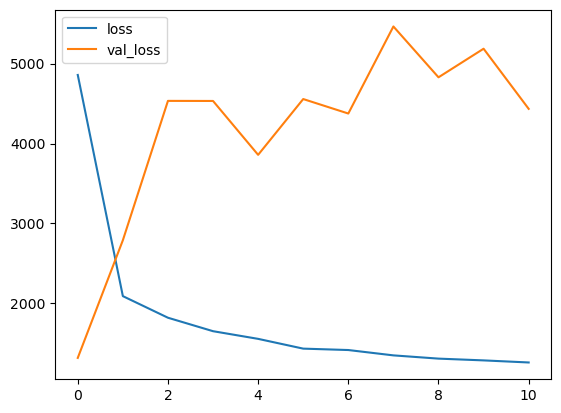

In [33]:
loss = pd.DataFrame(history.history)
loss.plot();

In [34]:
tahmin = model.predict(x_test)
r2_score(tahmin, y_true) * 100

856/856 [==============================] - 2s 2ms/step


72.6514295314525

### en iyi modeli kullanarak test için tahmin yapıp csv dosyası olarak kaydedelim.

In [36]:
test

,country,store,product,num_sold,year,month
0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,NaN,2022,1
1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,NaN,2022,1
2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,NaN,2022,1
3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,NaN,2022,1
4,Argentina,Kaggle Learn,Using LLMs to Write Better,NaN,2022,1
...,...,...,...,...,...,...
27370,Spain,Kagglazon,Using LLMs to Improve Your Coding,NaN,2022,12
27371,Spain,Kagglazon,Using LLMs to Train More LLMs,NaN,2022,12
27372,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,NaN,2022,12
27373,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,NaN,2022,12


In [37]:
test.drop('num_sold', axis = 1, inplace = True)

In [38]:
test = pd.get_dummies(test, drop_first = True)

In [39]:
test_submission = pd.DataFrame(columns = ['id', 'num_sold'])
test_submission['id'] = sample_submission['id']
model = RandomForestRegressor()
model.fit(x, y)
tahmin =  model.predict(test)

In [40]:
test_submission['num_sold'] = tahmin
test_submission

,id,num_sold
0,136950,27.677384
1,136951,28.807524
2,136952,4.159759
3,136953,27.157754
4,136954,23.364670
...,...,...
27370,164320,544.941352
27371,164321,528.198868
27372,164322,83.538944
27373,164323,487.243963


In [41]:
test_submission.to_csv('random_tahmin.csv', index = False)